In [1]:
import keras
from keras.preprocessing import image
from keras.applications.xception import (Xception, preprocess_input, decode_predictions)
from keras import models 
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import matplotlib.pyplot as plt

# import cv2
from PIL import Image

import numpy as np

import os
from os import listdir

/Users/anais/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class_list = ['1DGE', '1DGF', '1DGS',
 '1DPE',
 '1DPF',
 '1DPS',
 '1DRE',
 '1DRF',
 '1DRS',
 '1OGE',
 '1OGF',
 '1OGS',
 '1OPE',
 '1OPF',
 '1OPS',
 '1ORE',
 '1ORF',
 '1ORS',
 '1SGE',
 '1SGF',
 '1SGS',
 '1SPE',
 '1SPF',
 '1SPS',
 '1SRE',
 '1SRF',
 '1SRS',
 '2DGE',
 '2DGF',
 '2DGS',
 '2DPE',
 '2DPF',
 '2DPS',
 '2DRE',
 '2DRF',
 '2DRS',
 '2OGE',
 '2OGF',
 '2OGS',
 '2OPE',
 '2OPF',
 '2OPS',
 '2ORE',
 '2ORF',
 '2ORS',
 '2SGE',
 '2SGF',
 '2SGS',
 '2SPE',
 '2SPF',
 '2SPS',
 '2SRE',
 '2SRF',
 '2SRS',
 '3DGE',
 '3DGF',
 '3DGS',
 '3DPE',
 '3DPF',
 '3DPS',
 '3DRE',
 '3DRF',
 '3DRS',
 '3OGE',
 '3OGF',
 '3OGS',
 '3OPE',
 '3OPF',
 '3OPS',
 '3ORE',
 '3ORF',
 '3ORS',
 '3SGE',
 '3SGF',
 '3SGS',
 '3SPE',
 '3SPF',
 '3SPS',
 '3SRE',
 '3SRF',
 '3SRS']

In [3]:
image_path= 'static/images/cropped/test3.png'
model_path = 'static/model/final.h5'
image_size = (150, 150)
folderpath = 'static/images/cropped'

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(81))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.load_weights(model_path)

In [5]:
def predictor(image_path):
    
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    # print(x.shape)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    # print(max(predictions[0]))
    list_a = predictions[0]
    list_b = class_list
    zip_test = list(zip(list_a, list_b))
    
    return max(zip_test)

In [6]:
def find_cropped_images(folderpath):
    return [folderpath + '/' + v for v in os.listdir(folderpath) if v != '.DS_Store']

In [7]:
find_cropped_images(folderpath)

['static/images/cropped/test.png',
 'static/images/cropped/test10.png',
 'static/images/cropped/test11.png',
 'static/images/cropped/test12.png',
 'static/images/cropped/test2.png',
 'static/images/cropped/test3.png',
 'static/images/cropped/test4.png',
 'static/images/cropped/test5.png',
 'static/images/cropped/test6.png',
 'static/images/cropped/test7.png',
 'static/images/cropped/test8.png',
 'static/images/cropped/test9.png']

In [8]:
prediction_tuples = [predictor(png) for png in find_cropped_images(folderpath)]

In [9]:
prediction_tuples

[(0.829691, '3DPE'),
 (0.6058629, '3DPS'),
 (0.8519651, '2ORF'),
 (0.7429068, '3OPE'),
 (0.49834728, '1SGS'),
 (0.6321677, '2OPF'),
 (0.8696189, '1SGF'),
 (0.43739784, '3OPE'),
 (0.98763055, '2ORF'),
 (0.4382572, '3OPS'),
 (0.5274945, '1SGE'),
 (0.885067, '3SRS')]

In [10]:
def prediction_tuples():
    predictions = [predictor(png) for png in find_cropped_images(folderpath)]
    return predictions

In [11]:
prediction_tuples()

[(0.829691, '3DPE'),
 (0.6058629, '3DPS'),
 (0.8519651, '2ORF'),
 (0.7429068, '3OPE'),
 (0.49834728, '1SGS'),
 (0.6321677, '2OPF'),
 (0.8696189, '1SGF'),
 (0.43739784, '3OPE'),
 (0.98763055, '2ORF'),
 (0.4382572, '3OPS'),
 (0.5274945, '1SGE'),
 (0.885067, '3SRS')]

In [34]:
test_serializable = prediction_tuples()

In [35]:
import pandas as pd
test = pd.Series(test_serializable).to_json(orient='values')

In [36]:
test

'[[0.4397166371,"3OGS"],[0.1995119601,"3ORF"],[0.6648430228,"3ORF"],[0.3723426461,"3OPS"],[0.2247031033,"2SGF"],[0.5251312256,"3ORF"],[0.3840506077,"2SGF"],[0.3680585921,"1SPE"],[0.8400274515,"2DRF"],[0.4098587632,"3DPE"],[0.3719320893,"2DGE"],[0.2963016033,"3ORS"]]'

In [39]:
def show_images(image_path):
    img = image.load_img(image_path, target_size=image_size)
    return plt.imshow(img)

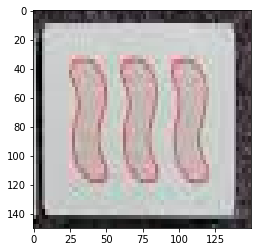

In [44]:
for image_path in find_cropped_images(folderpath):
    img = image.load_img(image_path, target_size=image_size)
    plt.imshow(img)
    

In [71]:
def loadImages(imagepath):
    # return array of images

    imagesList = imagepath
    loadedImages = []
    for image in imagesList:
        img = Image.open(image)
        loadedImages.append(img)

    return loadedImages

In [77]:
imgs = loadImages(find_cropped_images(folderpath))
imgs

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=667x708 at 0x118882518>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=73x48 at 0x118882588>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=71x49 at 0x118882438>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=70x47 at 0x1188822E8>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=70x47 at 0x1039377F0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=69x48 at 0x11889FA90>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=74x49 at 0x1188B0208>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=72x47 at 0x1188B02B0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=70x46 at 0x118937908>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=70x47 at 0x118937A90>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=69x48 at 0x1187D36A0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=73x48 at 0x118937B38>]

In [74]:
for img in imgs:
    # you can show every image
    img.show()

In [76]:
import glob
import imageio

for image_path in glob.glob('static/images/cropped/test.png'):
    im = imageio.imread(image_path)
    print (im.shape)
    print (im.dtype)

(708, 667, 4)
uint8


In [78]:
testrange = range(0,13)
testrange

range(1, 12)

In [79]:
range(1,12)

range(1, 12)

In [83]:
list(range(0,12))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]